# Modelo global do campo de gravidade eigen6c4

Este script mostra algumas quantidades preditas pelo modelo global do campo de gravidade **eigen-6C4** (Förste et al., 2014). Os coeficientes que descrevem este modelo estão no arquivo `eigen-6c4.gfc`, que pode ser baixado no site do IGCEM, na página [Table of models](http://icgem.gfz-potsdam.de/ICGEM/modelstab.html).

* Förste C., Bruinsma S.L., Abrikosov O., Lemoine J.-M., Schaller T., Götze H.-J., Ebbing J., Marty J.C., Flechtner F., Balmino G., Biancale R., 2014, EIGEN-6C4 The latest combined global gravity field model including GOCE data up to degree and order 2190 of GFZ Potsdam and GRGS Toulouse, 5th GOCE User Workshop, Paris, 25-28 November 2014, url: http://icgem.gfz-potsdam.de/ICGEM/documents/Foerste-et-al-EIGEN-6C4.pdf

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap

In [2]:
import fatiando
from fatiando import gridder

In [3]:
import minhas_funcoes as mf

### Função para plotar os estados brasileiros

A função na célula abaixo foi retirada do blog [python4oceanographers](https://ocefpaf.github.io/python4oceanographers/blog/2013/08/12/brazil-states-map/). Os dados `shapefile` com os estados brasileiros foram baixados no site do [Global Administrative Areas](http://www.gadm.org/country).

In [4]:
def drawstates(ax, shapefile='estados_Brasil/BRA_adm0.shp'):
        shp = m.readshapefile(shapefile, 'states', drawbounds=True)
        for nshape, seg in enumerate(m.states):
            poly = Polygon(seg, facecolor='0.75', edgecolor='k')
            ax.add_patch(poly)

### Dados baixados no site do [IGCEM](http://icgem.gfz-potsdam.de/ICGEM/)

De acordo com o IGCEM, os conjuntos de dados abaixo são provenientes de diferentes *Funcionais do Geopotencial* (*Functionals of the Geopotential*). No [*Calculation Service* do IGCEM](http://icgem.gfz-potsdam.de/ICGEM/Service.html) há uma legenda (figura abaixo) especificando cada tipo de dado.

<img src='functionals_geopotential.png', width=1000>

Todos dados foram baixados do [*Calculation Service* do IGCEM](http://icgem.gfz-potsdam.de/ICGEM/Service.html), estão armazenados nos arquivos `eigen-6c4-XXXXX.gdf.txt` e `etopo1-XXXXX.gdf.txt`, são referidos ao elipsoide WGS84 e foram calculados sobre o mesmo grid de coordenadas geodésicas espaçadas de $1^{\circ}$, variando de $0^{\circ}$ a $360^{\circ}$ ao longo da longitude $\lambda$ e de $-90^{\circ}$ a $90^{\circ}$ ao longo da latitude $\varphi$. 

#### Topografia/batimetria predita pelo modelo ETOPO1

In [5]:
longitude, latitude, topografia = np.loadtxt('etopo1-18001.gdf.txt', skiprows=29, unpack=True)

In [6]:
topo_positiva = (topografia > 0.)
topo_negativa = (topografia < 0.)

In [7]:
longitude_min = np.min(longitude)
longitude_max = np.max(longitude)

latitude_min = np.min(latitude)
latitude_max = np.max(latitude)

In [8]:
longitude_central = 0.5*(longitude_max + longitude_min)
latitude_central = 0.5*(latitude_max + latitude_min)

In [9]:
area = [longitude_min, longitude_max,
        latitude_min, latitude_max]

In [10]:
area

[0.0, 360.0, -90.0, 90.0]

#### Distúrbio de gravidade

In [11]:
altitude_ortometrica, disturbio = np.loadtxt('eigen-6c4-18000.gdf.txt', skiprows=35, usecols=(2,3), unpack=True)

#### Gravidade

In [12]:
gravidade = np.loadtxt('eigen-6c4-18026.gdf.txt', skiprows=34, usecols=(3,), unpack=True)

**geoid**

In [13]:
geoide = np.loadtxt('eigen-6c4-18031.gdf.txt', skiprows=36, usecols=(2,), unpack=True)

**gravity_anomaly_cl**

In [14]:
an_gravidade = np.loadtxt('eigen-6c4-18444.gdf.txt', skiprows=35, usecols=(2,), unpack=True)

**gravity_anomaly_bg**

In [15]:
bouguer = np.loadtxt('eigen-6c4-18452.gdf.txt', skiprows=37, usecols=(2,), unpack=True)

### Coordenadas x y da projeção cartográfica

A projeção foi calculada com o [Basemap](http://matplotlib.org/basemap/users/index.html). Para os exemplos mostrados abaixo, a projeção escolhida foi a de [Robinson](http://matplotlib.org/basemap/users/robin.html).

In [16]:
m = Basemap(projection='robin',lon_0=0,resolution='c')
x, y = m(longitude, latitude)

In [17]:
print 'x min.  = %12.5f km' % (np.min(x)*0.001)
print 'x medio = %12.5f km' % (np.mean(x)*0.001)
print 'x max.  = %12.5f km' % (np.max(x)*0.001)
print 'x var.  = %12.5f km' % ((np.max(x) - np.min(x))*0.001)
print 'y min.  = %12.5f km' % (np.min(y)*0.001)
print 'y medio = %12.5f km' % (np.mean(y)*0.001)
print 'y max.  = %12.5f km' % (np.max(y)*0.001)
print 'y var.  = %12.5f km' % ((np.max(y) - np.min(y))*0.001)

x min.  =     94.37109 km
x medio =  17026.64519 km
x max.  =  33973.59233 km
x var.  =  33879.22124 km
y min.  =      0.00000 km
y medio =   8615.49905 km
y max.  =  17230.99810 km
y var.  =  17230.99810 km


### Parâmetros do datum geodésico WGS84

In [18]:
a, f, GM, omega = mf.WGS84()

### Gravidade normal

**Sobre a topografia ($\gamma$)**

In [19]:
gamma = mf.gamma_closedform(a, f, GM, omega, latitude, altitude_ortometrica)

**Sobre o elipsoide WGS84 ($\gamma_{0}$)**

In [20]:
gamma0 = mf.gamma_closedform(a, f, GM, omega, latitude, 
                             np.zeros_like(altitude_ortometrica))

**Aproximação sobre a topografia ($\mathbf{\gamma}_{aprox}$)**

In [21]:
gamma_aproximado = gamma0 - 0.3086*altitude_ortometrica

### Anomalias calculadas

**Constante Gravitacional** (ou [*Newtonian constant of gravitation*](http://physics.nist.gov/cgi-bin/cuu/Category?view=html&Universal.x=58&Universal.y=11)) em $\frac{m^{3}}{kg \, s^{2}}$

In [22]:
G = 6.67408e-11

**Correção Ar-livre**

In [23]:
ca = -0.3086*altitude_ortometrica

**Correção de Bouguer (platô)**

Neste cálculo foi considerado uma densidade de $\rho_{c} = 2670 \: \frac{kg}{m^{3}}$ para a correção sobre os continentes (altitudes positivas) e uma densidade de $\rho_{a} = (2670 - 1025)\: \frac{kg}{m^{3}}$ para a correção sobre os oceanos (altitudes negativas).

In [24]:
rho_c = 2670.
rho_a = 1025.

cb_continente = np.zeros_like(topografia)
cb_continente[topo_positiva] = 2.*np.pi*G*1.0e5*rho_c*topografia[topo_positiva]

cb_oceano = np.zeros_like(topografia)
cb_oceano[topo_negativa] = 2.*np.pi*G*1.0e5*(rho_c - rho_a)*topografia[topo_negativa]

cb = cb_continente + cb_oceano

**Anomalia Ar-livre**

In [25]:
ar_livre = gravidade - gamma0 - ca

**Anomalia Bouguer (incompleta)**

Neste cálculo foi considerado uma densidade de $\rho_{c} = 2670 \: \frac{kg}{m^{3}}$ para a correção sobre os continentes (altitudes positivas) e uma densidade de $\rho = (\rho_{c} - \rho_{a})\: \frac{kg}{m^{3}}$ para a correção sobre os oceanos (altitudes negativas), em que $\rho_{a} = 1025 \: \frac{kg}{m^{3}}$.

In [26]:
bouguer_calculada = gravidade - gamma0 - ca - cb

**Distúrbio de gravidade**

In [27]:
disturbio_calculado = gravidade - gamma

**Moho isostática (modelo de Airy-Heiskanen)**

O modelo de Airy_Heiskanen é um modelo de compensação isostática local, que considera a existência de um espessamento crustal $t_{c}$ sob os continentes e um afinamento crustal $t_{o}$ sob os oceanos. Geralmente, o espessamento crustal é denominado *raiz* e o afinamento crustal é denominado *antirraiz*. Ambos são definidos em relação a uma espessura crustal de referência $T$ e calculados em função da altitude $h$, da densidade $\rho_{c}$ da crosta, da densidade $\rho_{m}$ do manto e da densidade $\rho_{a}$ da água salgada.

$t_{c} = \dfrac{\rho_{c}}{\rho_{m} - \rho_{c}} \, h$, em que $h > 0$ (espessamento sob os continentes)

$t_{o} = \dfrac{\rho_{c} - \rho_{a}}{\rho_{m} - \rho_{c}} \, h$, em que $h < 0$ (afinamento sob os oceanos)

In [28]:
T = 40000.0 # metros

rho_m = 3270.0 

tc = np.zeros_like(topografia)
tc[topo_positiva] = rho_c*topografia[topo_positiva]/(rho_m - rho_c)

to = np.zeros_like(topografia)
to[topo_negativa] = (rho_c - rho_a)*topografia[topo_negativa]/(rho_m - rho_c)

moho_ah = T + tc + to

**Pontos iniciais e finais dos perfis analisados**

In [29]:
longitudes_perfis = [360. - 89., 360. - 29.]
latitudes_perfis = [-15., -15.]

In [30]:
longitudes_perfis = np.array(longitudes_perfis)
latitudes_perfis = np.array(latitudes_perfis)

In [31]:
p1, p2 = m(longitudes_perfis, latitudes_perfis)
perfis = np.transpose([p1,p2])

In [32]:
perfil_topografia = gridder.profile(x, y, topografia, perfis[0,:], perfis[1,:], 200)
perfil_bouguer = gridder.profile(x, y, bouguer, perfis[0,:], perfis[1,:], 200)
perfil_disturbio = gridder.profile(x, y, disturbio, perfis[0,:], perfis[1,:], 200)
perfil_moho_ah = gridder.profile(x, y, -moho_ah, perfis[0,:], perfis[1,:], 200)

### Estatísticas e "mapas"

In [33]:
topografia_min, topografia_media, topografia_max, topografia_var = mf.estatistica(topografia, 'm')

     min.:     -9200.00000 m
    media:     -1885.03633 m
     max.:      5855.00000 m
var. max.:     15055.00000 m


C:\Anaconda\lib\site-packages\matplotlib\tri\triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)
minhas_funcoes.py:266: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if perfis != None:


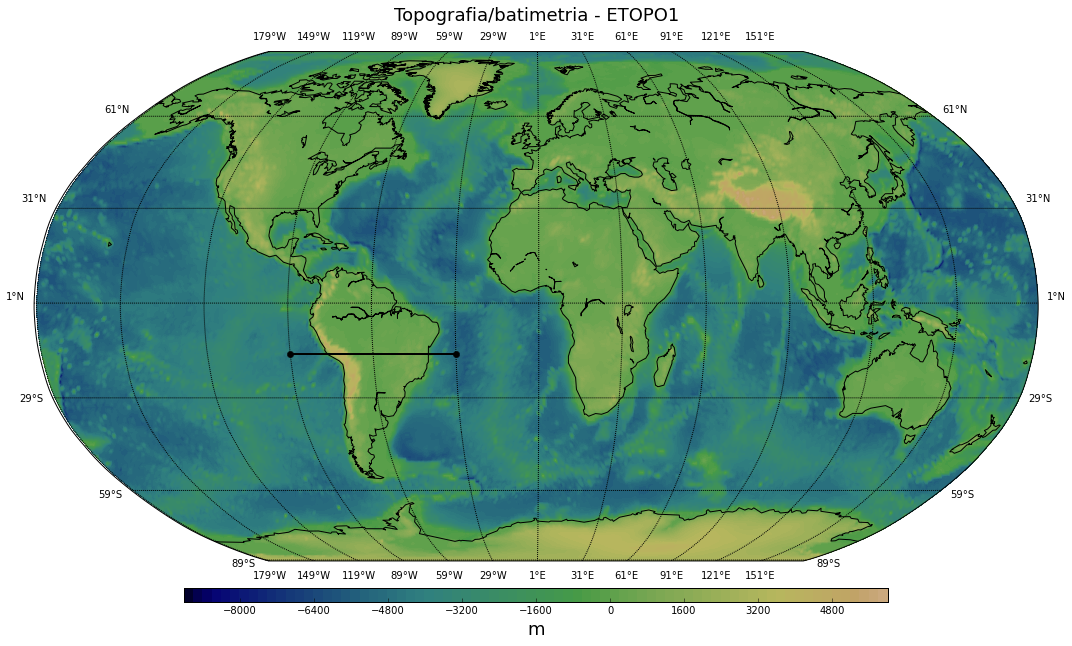

In [34]:
mf.plota_mapa(m, x, y, topografia, area, 'm', 'Topografia/batimetria - ETOPO1', 'gist_earth', 
              (18, 12), 30., perfis, estados=None, escala=None, eixos=True)

In [35]:
geoide_min, geoide_medio, geoide_max, geoide_var = mf.estatistica(geoide, 'm')

     min.:      -106.18443 m
    media:        -0.86917 m
     max.:        84.91729 m
var. max.:       191.10172 m


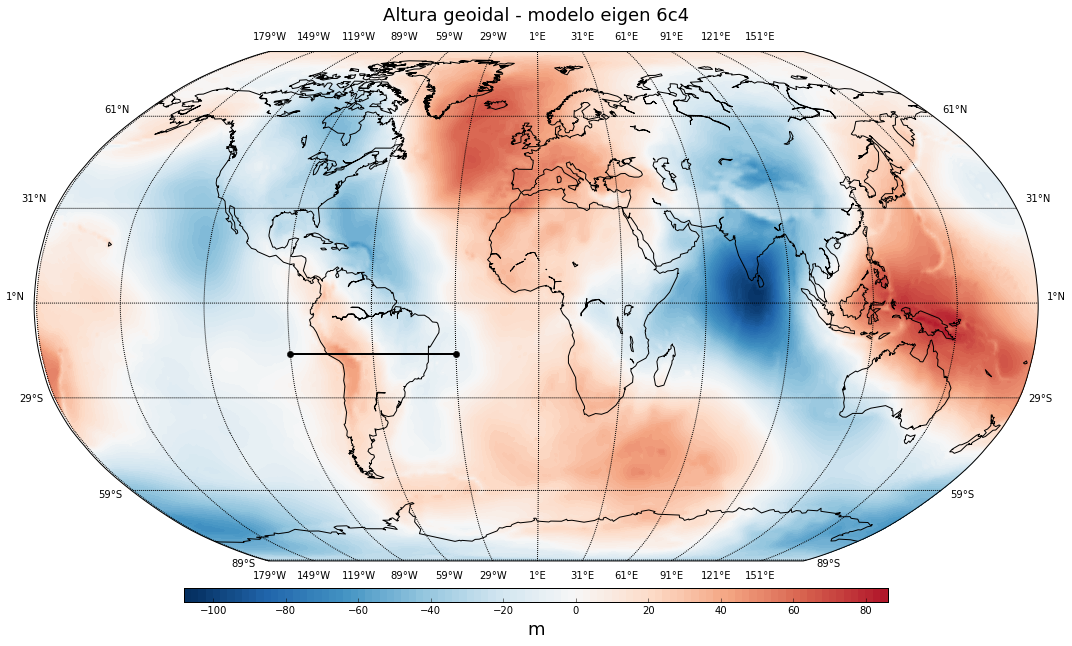

In [36]:
mf.plota_mapa(m, x, y, geoide, area, 'm', 'Altura geoidal - modelo eigen 6c4', 'RdBu_r',
              (18, 12), 30., perfis, estados=None, escala=None, eixos=True)

In [37]:
disturbio_min, disturbio_medio, disturbio_max, disturbio_var = mf.estatistica(disturbio, 'mGal')

     min.:      -302.16113 mGal
    media:        -0.72717 mGal
     max.:       394.95950 mGal
var. max.:       697.12063 mGal


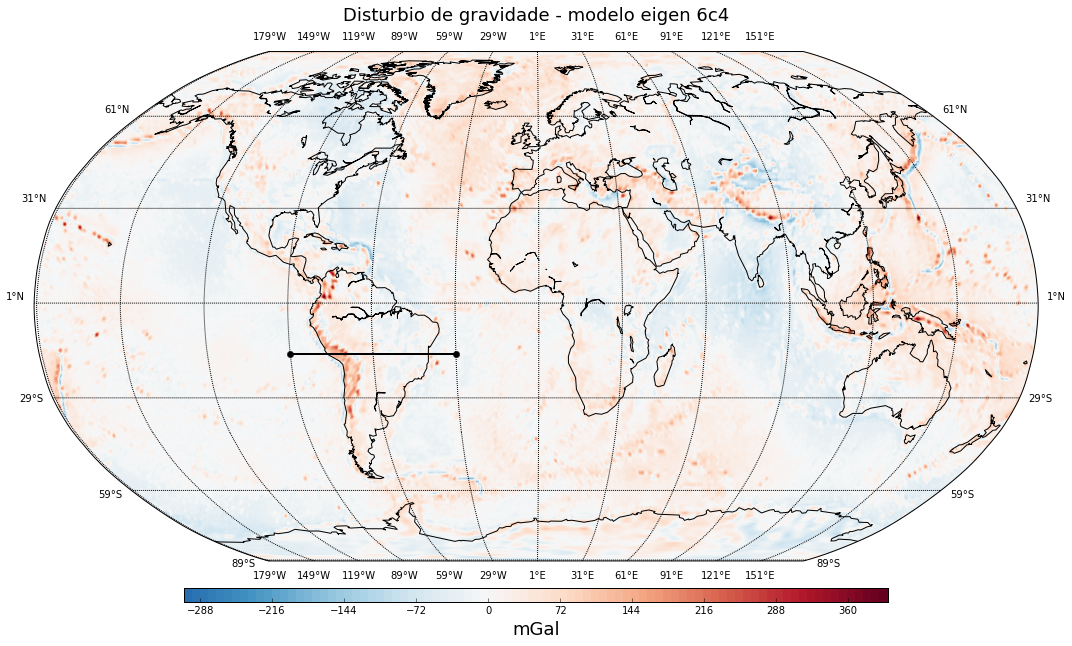

In [38]:
mf.plota_mapa(m, x, y, disturbio, area, 'mGal', 'Disturbio de gravidade - modelo eigen 6c4', 'RdBu_r',
              (18, 12), 30., perfis, estados=None, escala=None, eixos=True)

In [39]:
disturbio_calc_min, disturbio_calc_medio, disturbio_calc_max, disturbio_calc_var = mf.estatistica(disturbio_calculado, 'mGal')

     min.:      -301.30098 mGal
    media:        -0.45988 mGal
     max.:       384.91454 mGal
var. max.:       686.21552 mGal


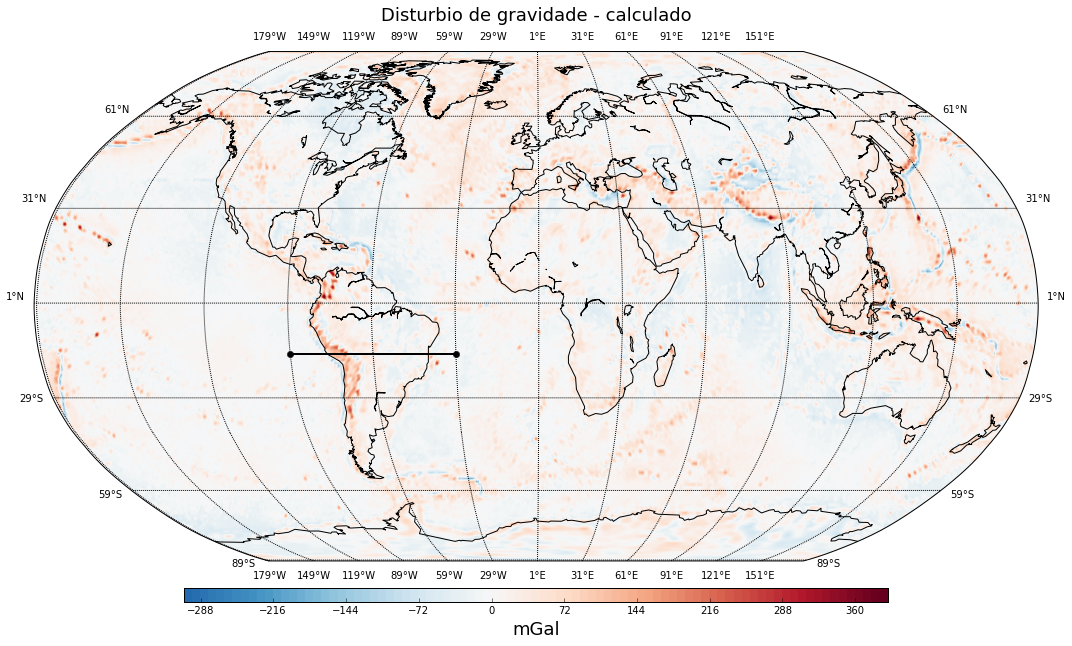

In [40]:
mf.plota_mapa(m, x, y, disturbio_calculado, area, 'mGal', 'Disturbio de gravidade - calculado', 'RdBu_r',
              (18, 12), 30., perfis, estados=None, escala=None, eixos=True)

In [41]:
ar_livre_min, ar_livre_medio, ar_livre_max, ar_livre_var = mf.estatistica(ar_livre, 'mGal')

     min.:      -301.30098 mGal
    media:        -0.33919 mGal
     max.:       385.21911 mGal
var. max.:       686.52009 mGal


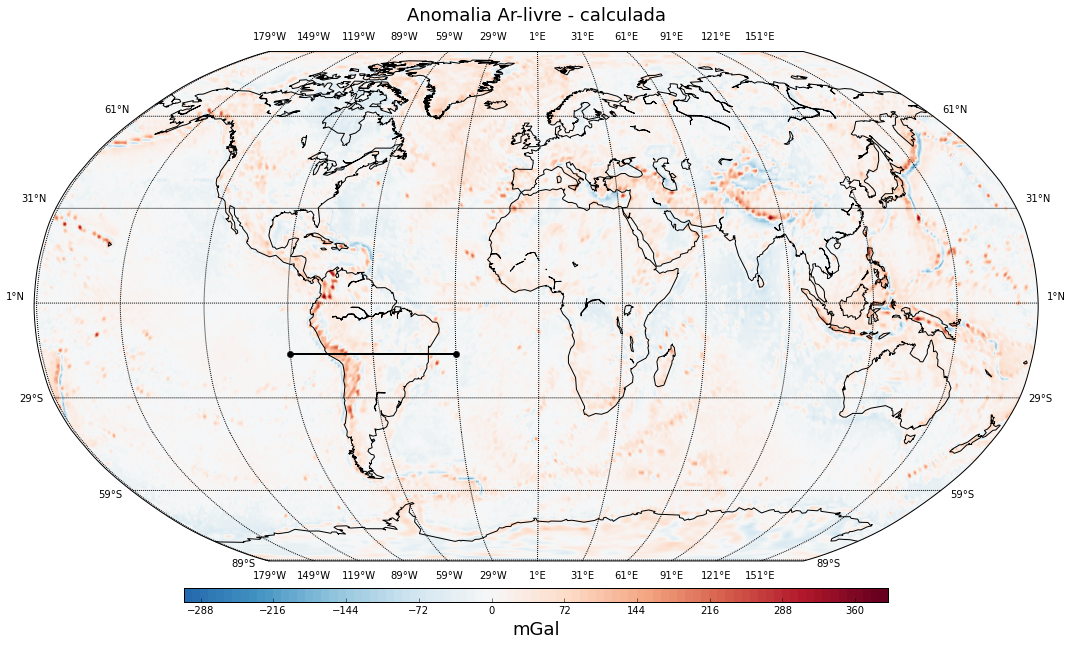

In [42]:
mf.plota_mapa(m, x, y, ar_livre, area, 'mGal', 'Anomalia Ar-livre - calculada', 'RdBu_r',
              (18, 12), 30., perfis, estados=None, escala=None, eixos=True)

In [43]:
bouguer_min, bouguer_medio, bouguer_max, bouguer_var = mf.estatistica(bouguer, 'mGal')

     min.:      -631.21824 mGal
    media:       113.29139 mGal
     max.:       455.45617 mGal
var. max.:      1086.67440 mGal


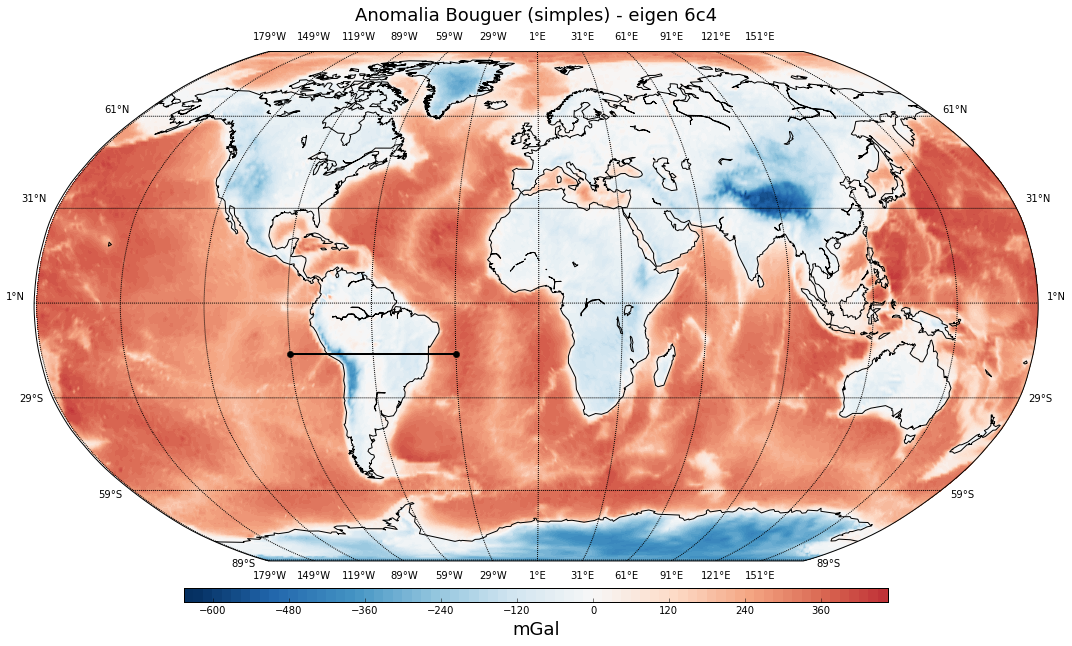

In [44]:
mf.plota_mapa(m, x, y, bouguer, area, 'mGal', 'Anomalia Bouguer (simples) - eigen 6c4', 'RdBu_r',
              (18, 12), 30., perfis, estados=None, escala=None, eixos=True)

In [45]:
bouguer_calculada_min, bouguer_calculada_medio, \
bouguer_calculada_max, bouguer_calculada_var = mf.estatistica(bouguer_calculada, 'mGal')

     min.:      -594.04276 mGal
    media:       113.30216 mGal
     max.:       453.95534 mGal
var. max.:      1047.99809 mGal


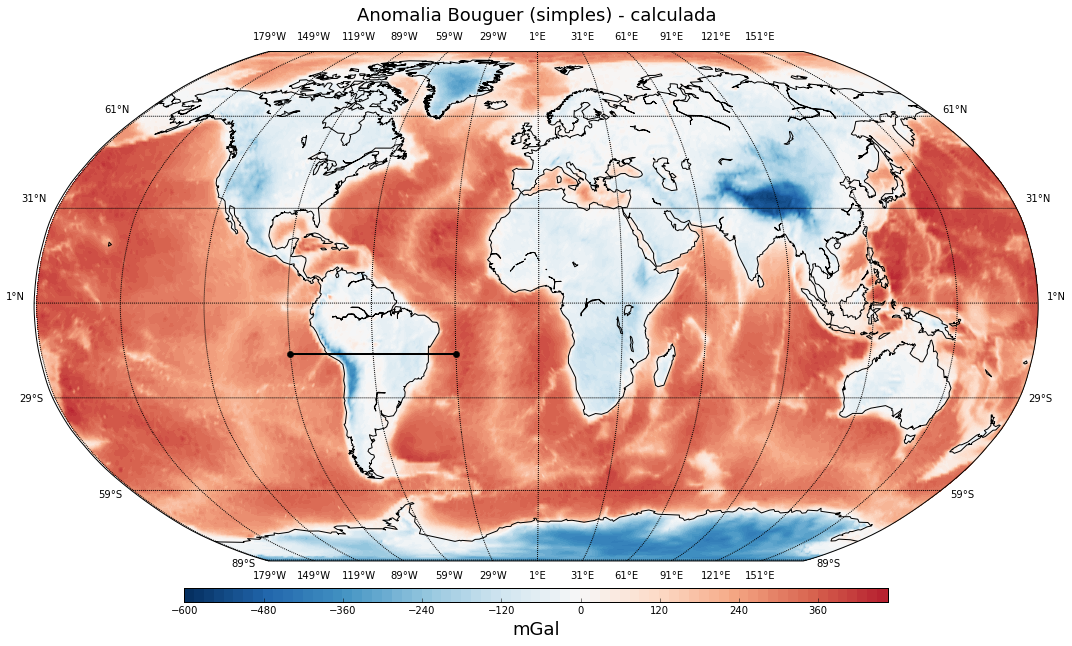

In [46]:
mf.plota_mapa(m, x, y, bouguer_calculada, area, 'mGal', 'Anomalia Bouguer (simples) - calculada', 'RdBu_r',
              (18, 12), 30., perfis, estados=None, escala=None, eixos=True)

In [47]:
moho_ah_min, moho_ah_media, moho_ah_max, moho_ah_var = mf.estatistica(moho_ah, 'm')

     min.:     14776.66667 m
    media:     35483.37704 m
     max.:     66054.75000 m
var. max.:     51278.08333 m


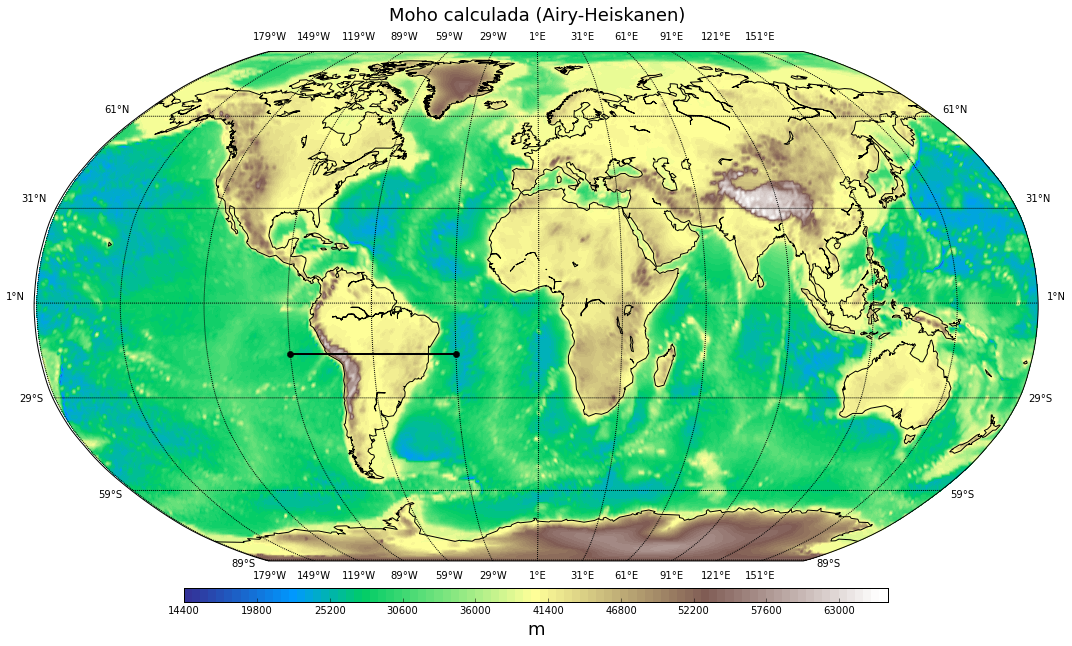

In [48]:
mf.plota_mapa(m, x, y, moho_ah, area, 'm', 'Moho calculada (Airy-Heiskanen)', 'terrain',
              (18, 12), 30., perfis, estados=None, escala=None, eixos=True)

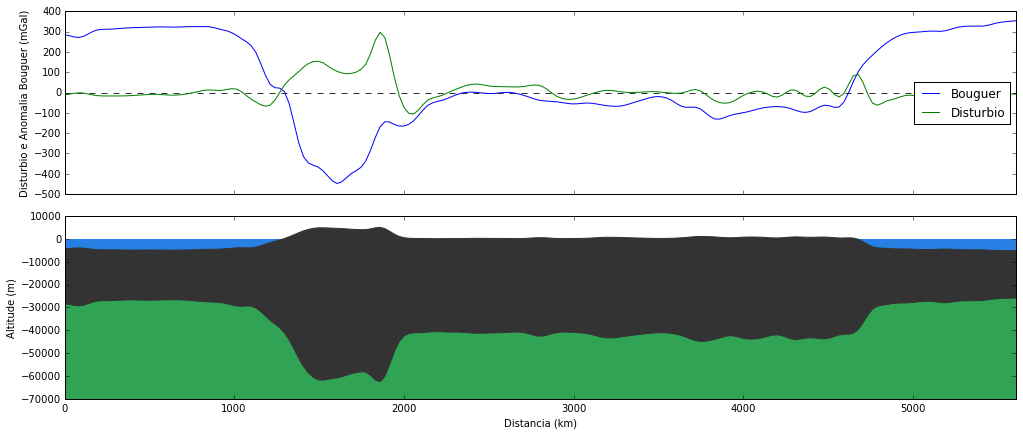

In [49]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(14, 6))
ax1, ax2 = axes
d = perfil_topografia[2]*0.001
ax2.fill_between([d.min(), d.max()], [0, 0], -10000, color='#2780E3')
ax2.fill_between([d.min(), d.max()], -10000, -70000, color='#31a354')
ax2.fill_between(d, perfil_topografia[3], perfil_moho_ah[3], color='#333333')
ax2.set_ylabel('Altitude (m)')
ax2.set_xlabel('Distancia (km)')
ax2.set_ylim(-70000., 10000.)

ax1.set_ylabel('Disturbio e Anomalia Bouguer (mGal)')
ax1.plot(d, perfil_bouguer[3], '-', label='Bouguer')
ax1.plot(d, perfil_disturbio[3], '-', label='Disturbio')
ax1.hlines(0, d.min(), d.max(), linestyles='--', color='#333333')
ax1.legend(loc='center right')
ax1.set_xlim(d.min(), d.max())
plt.tight_layout(h_pad=0, w_pad=0, pad=0)
plt.show()